In [0]:
# scikit-learn bootstrap
from sklearn.utils import resample

In [2]:
# data sample
data = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
data

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

In [5]:
# showing how work resample
print("n_samples = 2: ", resample(data, replace=True, n_samples=2, random_state=1))
print("n_samples = 3: ", resample(data, replace=True, n_samples=3, random_state=1))
print("n_samples = 4: ", resample(data, replace=True, n_samples=4, random_state=1))
print("n_samples = 5: ", resample(data, replace=True, n_samples=5, random_state=1))
print("n_samples = 2: ", resample(data, replace=True, n_samples=6, random_state=1))

n_samples = 2:  [0.6, 0.4]
n_samples = 3:  [0.6, 0.4, 0.5]
n_samples = 4:  [0.6, 0.4, 0.5, 0.1]
n_samples = 5:  [0.6, 0.4, 0.5, 0.1, 0.2]
n_samples = 2:  [0.6, 0.4, 0.5, 0.1, 0.2, 0.4]


In [3]:
# prepare bootstrap sample
boot = resample(data, replace=True, n_samples=4, random_state=1)
print('Bootstrap Sample: %s' % boot)

Bootstrap Sample: [0.6, 0.4, 0.5, 0.1]


In [6]:
# out of bag observations
oob = [x for x in data if x not in boot]
print('OOB Sample: %s' % oob)

OOB Sample: [0.2, 0.3]


# Examples

## Cross-validation: evaluating estimator performance
![](https://scikit-learn.org/stable/_images/grid_search_workflow.png)

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

X_train.shape, y_train.shape

((90, 4), (90,))

In [16]:
X_test.shape, y_test.shape

((60, 4), (60,))

In [19]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9666666666666667

## [Visualizing](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py)

In [0]:
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
np.random.seed(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

In [0]:
# Generate the class/group data
n_points = 100
X = np.random.randn(100, 10)

percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc)
               for ii, perc in enumerate(percentiles_classes)])

# Evenly spaced groups repeated once
groups = np.hstack([[ii] * 10 for ii in range(10)])

In [0]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

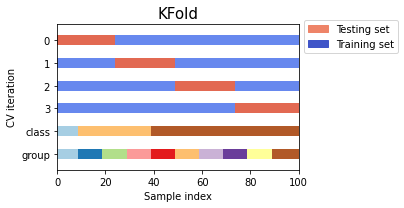

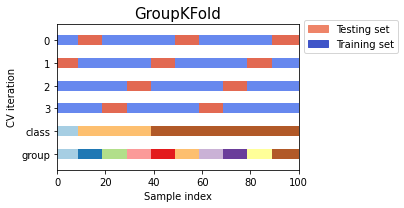

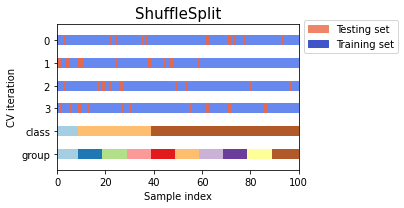

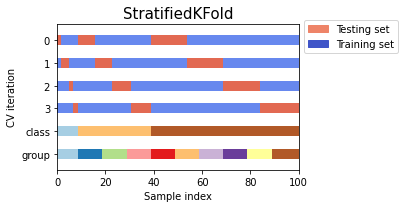

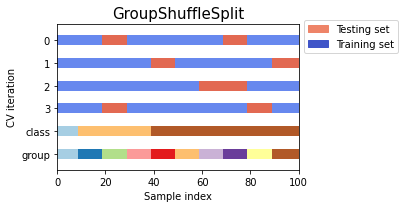

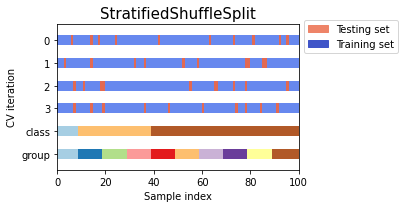

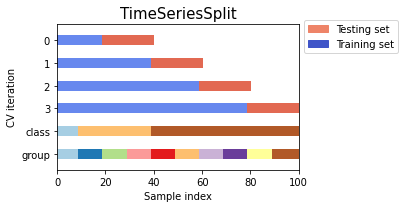

In [25]:
cvs = [KFold, GroupKFold, ShuffleSplit, StratifiedKFold,
       GroupShuffleSplit, StratifiedShuffleSplit, TimeSeriesSplit]


for cv in cvs:
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=.7)
plt.show()

Sourse:
- https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/
- [sklearn.utils.resample](https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html)
- [sklearn.model_selection: Model Selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)
- https://stats.stackexchange.com/questions/86040/rule-of-thumb-for-number-of-bootstrap-samples
- https://scikit-learn.org/stable/modules/cross_validation.html?highlight=bootstrap
- http://web.cs.iastate.edu/~jtian/cs573/Papers/Kohavi-IJCAI-95.pdf
- http://www.machinelearning.ru/wiki/index.php?title=%D0%A1%D0%BA%D0%BE%D0%BB%D1%8C%D0%B7%D1%8F%D1%89%D0%B8%D0%B9_%D0%BA%D0%BE%D0%BD%D1%82%D1%80%D0%BE%D0%BB%D1%8C#.D0.9F.D0.BE.D0.BB.D0.BD.D1.8B.D0.B9_.D1.81.D0.BA.D0.BE.D0.BB.D1.8C.D0.B7.D1.8F.D1.89.D0.B8.D0.B9_.D0.BA.D0.BE.D0.BD.D1.82.D1.80.D0.BE.D0.BB.D1.8C_.28complete_CV.29
